<a href="https://colab.research.google.com/github/Kbehrani/Codes/blob/main/Plants_Seedling_Classification_Problem_Statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description

### Background and Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

### Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

### Data Description

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:
images.npy
Label.csv
Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.

### List of Plant species

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet


In [66]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD    
from tensorflow.keras import optimizers                                             # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
# Load the image file of the dataset
data = np.load('/content/images.npy')
# Load the labels file of the dataset
labels = pd.read_csv('/content/Labels.csv')

In [21]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


**Getting all unique different categories into a list**

In [24]:
categ = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
num_categ = len(categ)
num_categ

12

**There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels.**

## Observation:

- Total number of plant categories are 12 ie., o/p preds should be 12
- We have a total of 4750 plant images
- Each image is of shape 128 X 128
- As the number of channels is 3, images are in RGB (Red, Blue, Green)

# Plotting images using OpenCV and matplotlib

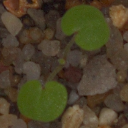

In [22]:
cv2_imshow(images[5])

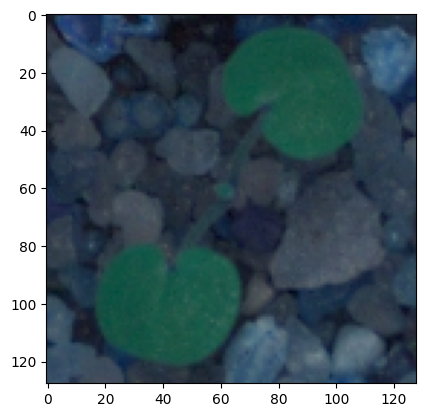

In [23]:
plt.imshow(images[5]);

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [15]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

# Exploratory Data Analysis

In [17]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

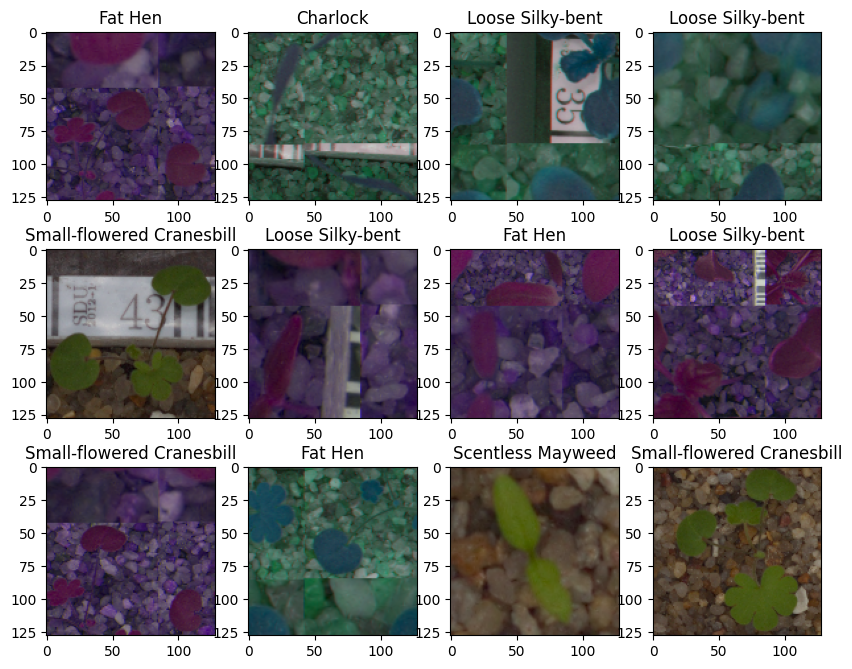

In [18]:
plot_images(images,labels)

**Checking for data imbalance**

In [66]:
labels['Label'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Small-flowered Cranesbill
1       Small-flowered Cranesbill
2       Small-flowered Cranesbill
3       Small-flowered Cranesbill
4       Small-flowered Cranesbill
                  ...            
4745             Loose Silky-bent
4746             Loose Silky-bent
4747             Loose Silky-bent
4748             Loose Silky-bent
4749             Loose Silky-bent
Name: Label, Length: 4750, dtype: object>

In [74]:
labels.rename(columns={0:'species'},inplace=True)

## Plant Categories Distribution

In [28]:
ylabels = pd.read_csv('Labels.csv')
ylabels.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

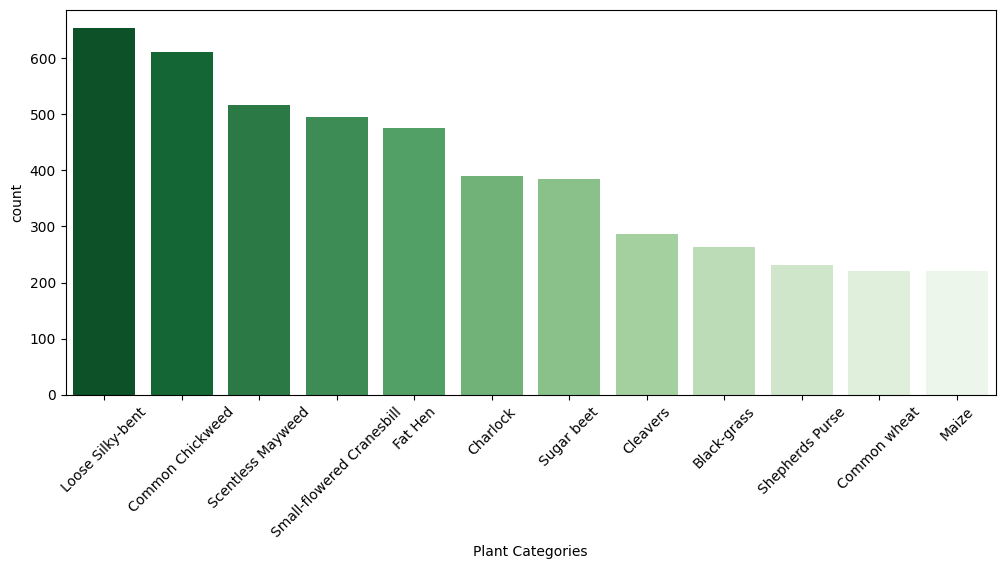

In [27]:
plt.rcParams["figure.figsize"] = (12,5)
sns.countplot(x=ylabels.iloc[:,-1],order = ylabels['Label'].value_counts().index, palette='Greens_r')
plt.xlabel('Plant Categories')
plt.xticks(rotation=45)

## Observation:

- As you can see from the above plot, the dataset is quite imbalanced.
- There are different count images in each category
- "Loose Silky bent" plant samples are more compared to other categories
- Least plant samples are for "Common Wheat", "Maize"

## Plotting differnt plant categories in 12X12 grid

In [29]:
#Importing ImageGrid to plot the plant sample images
from mpl_toolkits.axes_grid1 import ImageGrid

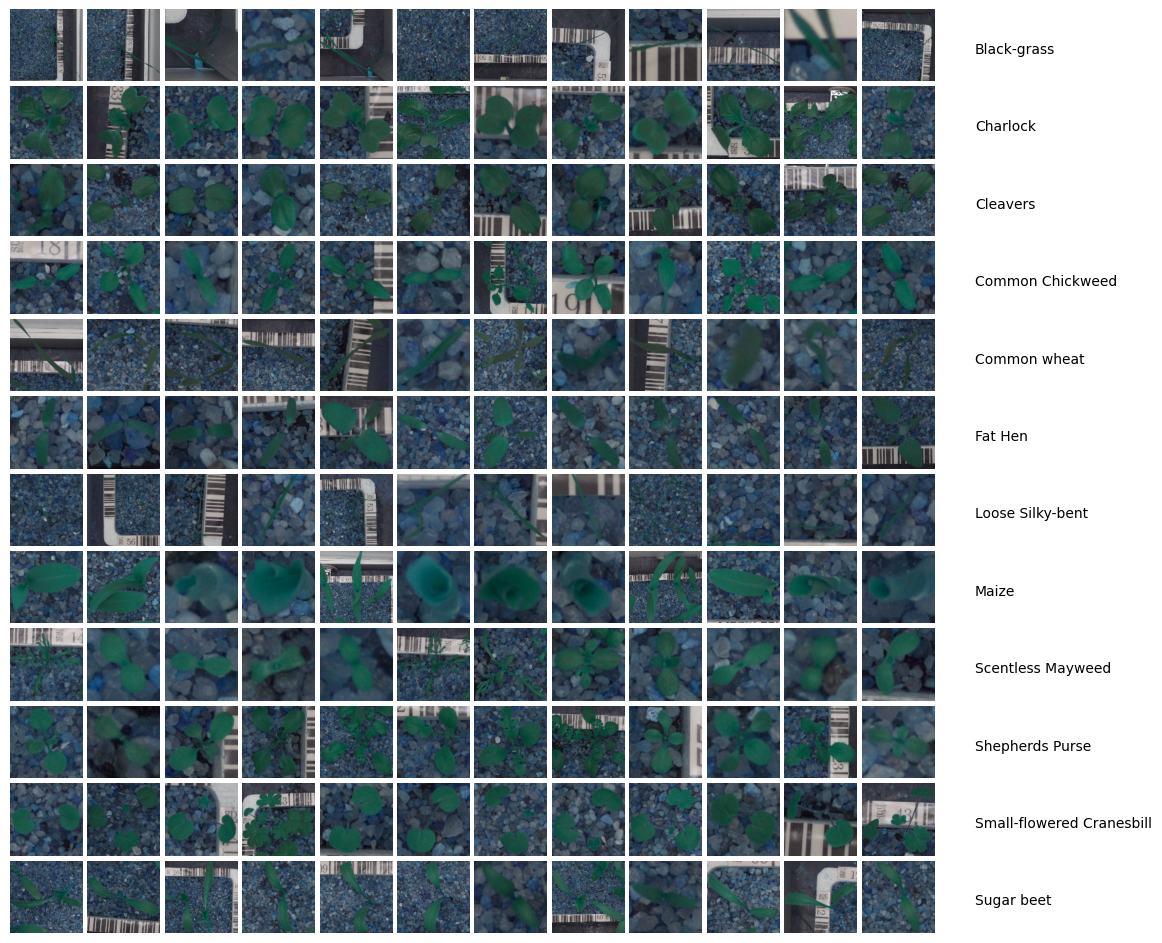

In [31]:
#defining a figure of size 12X12
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

#Plottting 12 images from each plant category
for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      ax.imshow(images[plant_indices[j]])
      ax.axis('off')
      if i % num_categ == num_categ - 1:
        #printing the names for each caterogy
        ax.text(200, 70, category, verticalalignment='center')
      i += 1
plt.show();


# Pre-processing the dataset 

## Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64

Resized to 50% and applied Gaussian Blurring with kernel size 3X3


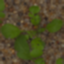



Original Image of size 128X128


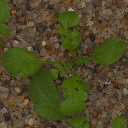

In [33]:
# Resizing the image size to half ie., from 128X128 to 64X64
img = cv2.resize(data[1000],None,fx=0.50,fy=0.50)

#Applying Gaussian Blur
img_g = cv2.GaussianBlur(img,(3,3),0)

#Displaying preprocessed and original images
print("Resized to 50% and applied Gaussian Blurring with kernel size 3X3")
cv2_imshow(img_g)
print('\n')
print("Original Image of size 128X128")
cv2_imshow(data[1000])

Converting to HSV and applying mask for the background and focusing only on plant

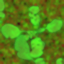

In [35]:
# Convert to HSV image
hsvImg = cv2.cvtColor(img_g, cv2.COLOR_BGR2HSV)
cv2_imshow(hsvImg)

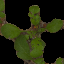

In [36]:
# Create mask (parameters - green color range)
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
mask = cv2.inRange(hsvImg, lower_green, upper_green)  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Create bool mask
bMask = mask > 0  

# Apply the mask
clearImg = np.zeros_like(img, np.uint8)  # Create empty image
clearImg[bMask] = img[bMask]  # Apply boolean mask to the origin image

#Masked Image after removing the background
cv2_imshow(clearImg)

**Applying Resize, Gaussian Blurr and Masking on All Images**

In [37]:
data_copy = data.copy()

In [38]:
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
preprocessed_data_color = []

for img in data:
  resize_img = cv2.resize(img,None,fx=0.50,fy=0.50)
  Gblur_img = cv2.GaussianBlur(resize_img,(3,3),0)
  hsv_img = cv2.cvtColor(Gblur_img, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv_img, lower_green, upper_green)  
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  bMask = mask > 0
  clearImg = np.zeros_like(resize_img, np.uint8)  # Create empty image
  clearImg[bMask] = resize_img[bMask]  # Apply boolean mask to the original image
  # clearImg1 = cv2.cvtColor(clearImg,cv2.COLOR_BGR2GRAY)

  preprocessed_data_color.append(clearImg)

#Preprocessed all plant images
preprocessed_data_color = np.asarray(preprocessed_data_color)

**Visualizing the preprocessed color plant images**

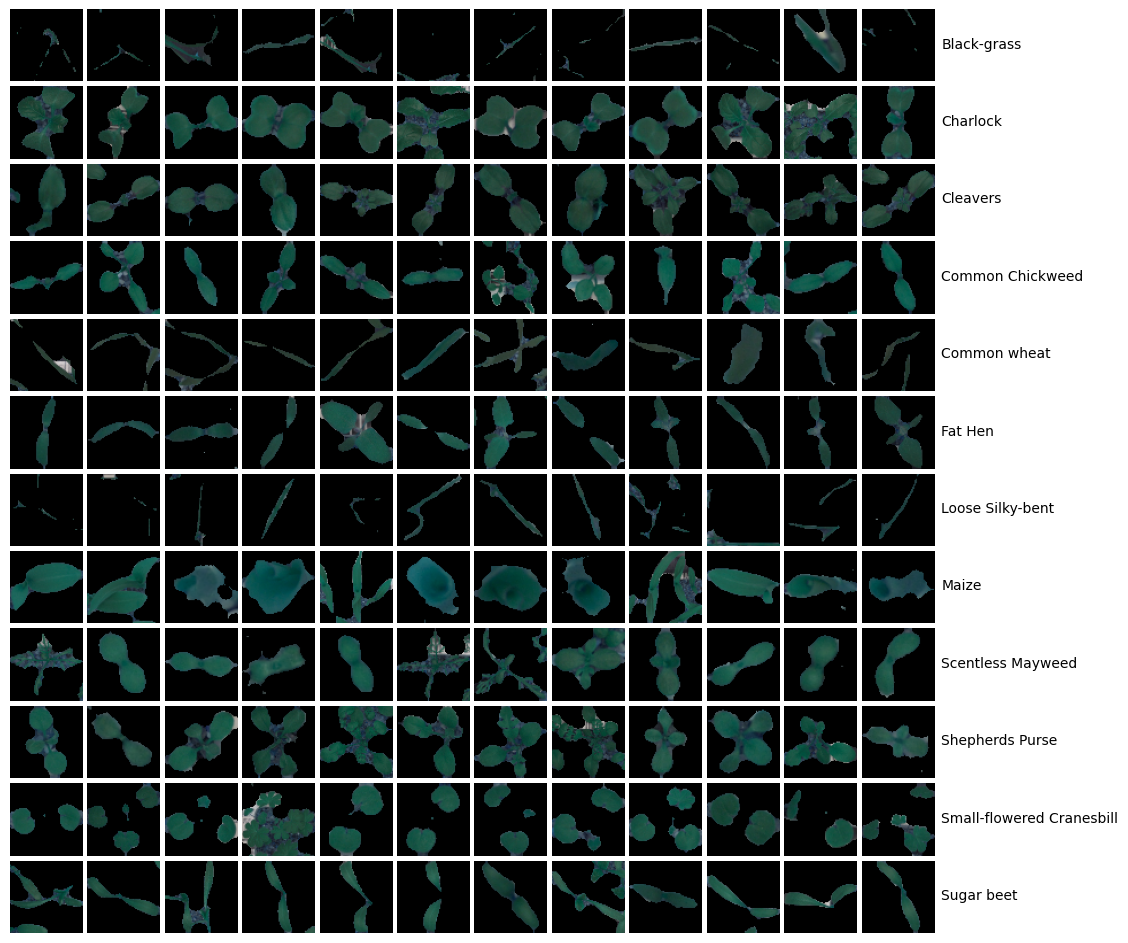

In [39]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_color[plant_indices[j]]/255.)
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

In [40]:
preprocessed_data_color.shape

(4750, 64, 64, 3)

**Converting all color images to Grayscale images**

In [41]:
preprocessed_data_gs = []
for img in preprocessed_data_color:
  gi = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  preprocessed_data_gs.append(gi)

preprocessed_data_gs = np.asarray(preprocessed_data_gs)

In [42]:
preprocessed_data_gs.shape

(4750, 64, 64)

**Visualizing the preprocessed Grayscale plant images**

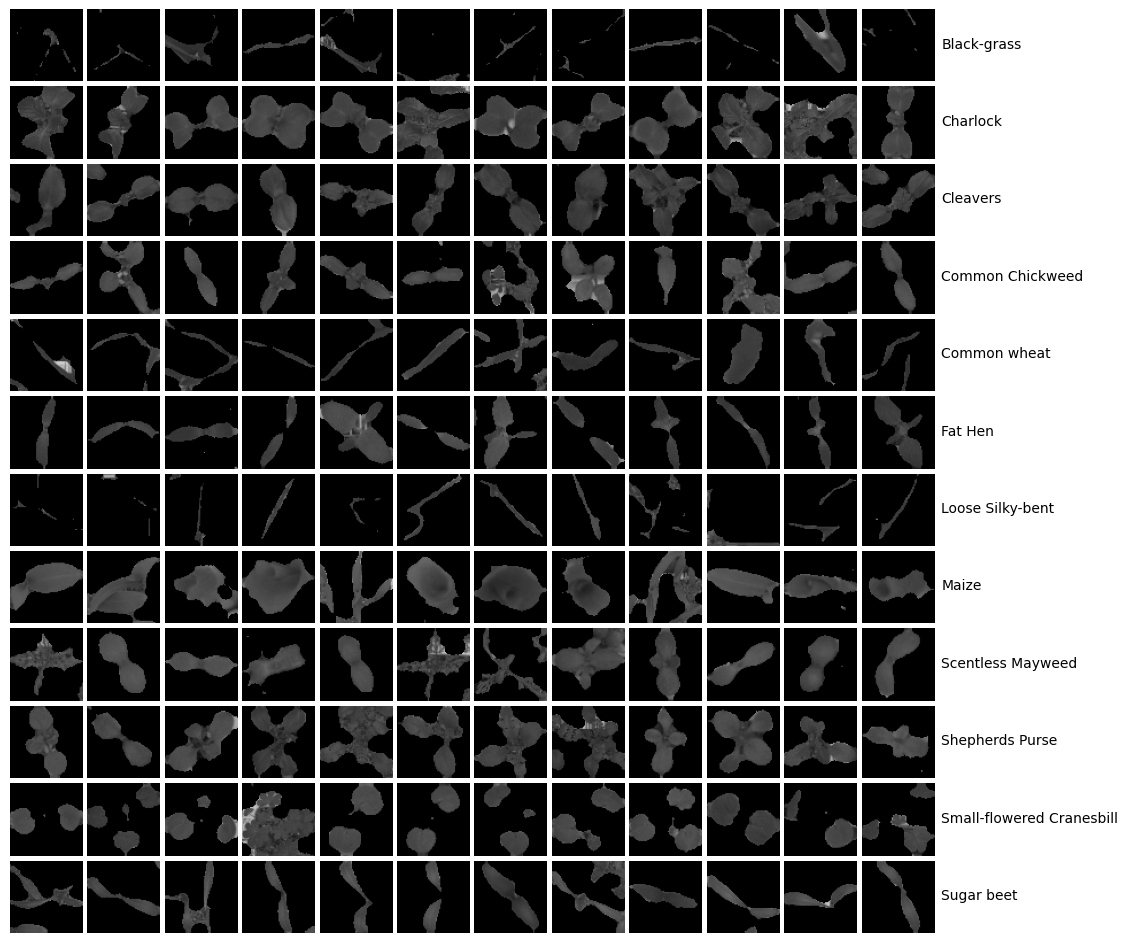

In [43]:
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_gs[plant_indices[j]],cmap='gray',vmin=0, vmax=255)
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

**Converting Grayscale to Edge images using Sobel and Laplacian**

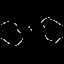

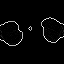

In [44]:
sobel = cv2.Sobel(preprocessed_data_gs[0]*255, cv2.CV_64F,1,1,ksize=3)
laplacian = cv2.Laplacian(preprocessed_data_gs[0]*255, cv2.CV_64F)
cv2_imshow(sobel)
print("\n")
cv2_imshow(laplacian)

**Converting all color images to Laplacian Edge detected images**

In [45]:
preprocessed_data_Edge_Lap = []
for img in preprocessed_data_gs:
  egi = cv2.Laplacian(img*255, cv2.CV_64F)
  preprocessed_data_Edge_Lap.append(egi)

preprocessed_data_Edge_Lap = np.asarray(preprocessed_data_Edge_Lap)

In [46]:
preprocessed_data_Edge_Lap.shape

(4750, 64, 64)

## Visualizing the preprocessed Edge plant images

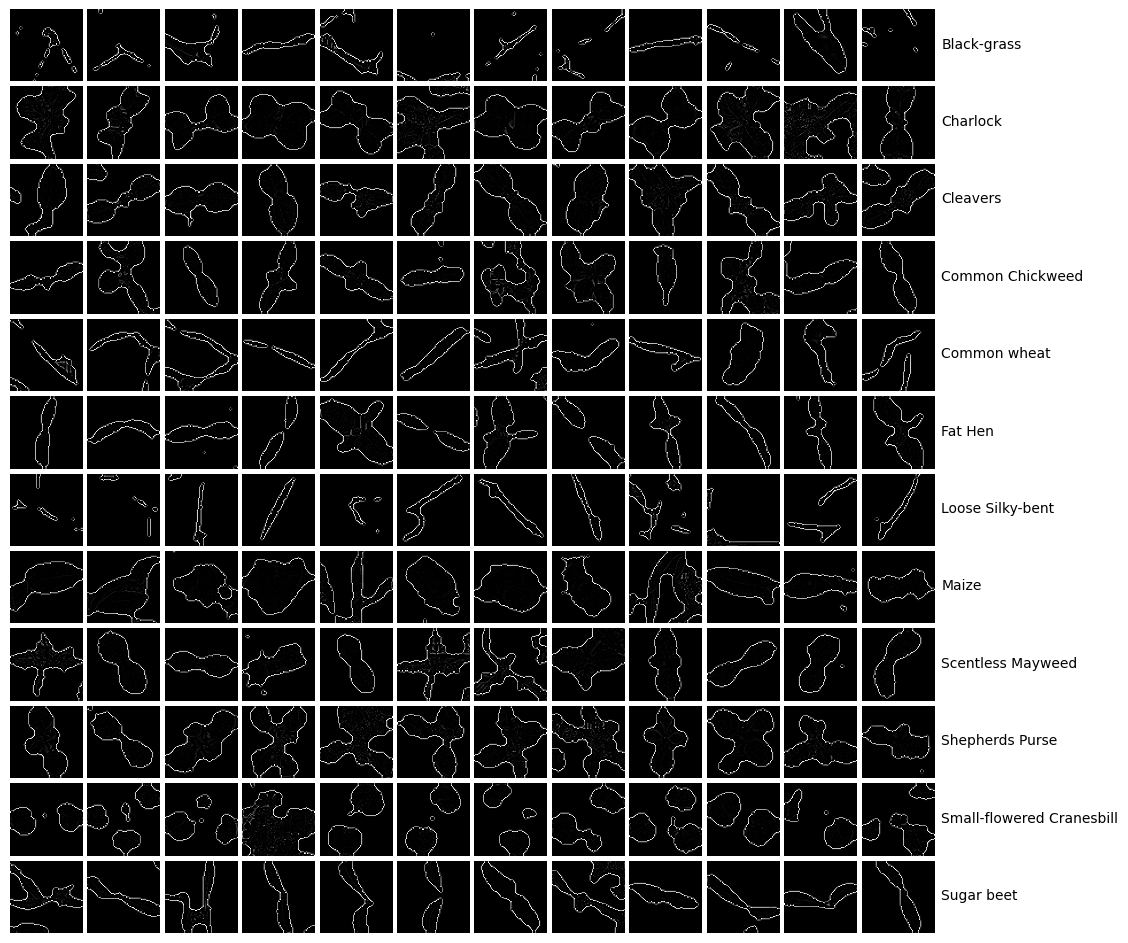

In [47]:
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_Edge_Lap[plant_indices[j]],cmap='gray',vmin=0, vmax=255)
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

# Data Normalization
**Normalization for Images**

In [48]:
preprocessed_data_gs = preprocessed_data_gs / 255.
preprocessed_data_color = preprocessed_data_color / 255.
preprocessed_data_Edge_Lap = preprocessed_data_Edge_Lap / 255.

**Label Encoding and One-Hot encoding for Plant categories**

In [49]:
ylabels['Label'] = ylabels['Label'].astype('category')
ylabels['Label'] = ylabels['Label'].cat.codes
ylabels.value_counts()

Label
6        654
3        611
8        516
10       496
5        475
1        390
11       385
2        287
0        263
9        231
4        221
7        221
dtype: int64

In [50]:
from tensorflow.keras.utils import to_categorical

ylabels = to_categorical(ylabels, num_classes=12)

print("Shape of y_train:", ylabels.shape)
print("One value of y_train:", ylabels[0])

Shape of y_train: (4750, 12)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Splitting the dataset

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
-We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [55]:
# Fixing the seed for random number generators
random_state = 42
import random
random.seed(random_state)

In [56]:
from sklearn.model_selection import train_test_split

val_split = 0.25
#1st split into train and test
X_train, X_test1, y_train, y_test1 = train_test_split(preprocessed_data_color, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#for my color image purpose and individual image pred.
X_train_color, X_test1_color, y_train_color, y_test1_color = train_test_split(data, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#2nd split into val and test
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)
#for my color image purpose and individual image pred.
X_val_color, X_test_color, y_val_color, y_test_color = train_test_split(X_test1_color, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)

X = np.concatenate((X_train, X_test1))
y = np.concatenate((y_train, y_test1))

In [57]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X_train shape:  (3325, 64, 64, 3)
y_train shape:  (3325, 12)
X_val shape:  (712, 64, 64, 3)
y_val shape:  (712, 12)
X_test shape:  (713, 64, 64, 3)
y_test shape:  (713, 12)
X shape:  (4750, 64, 64, 3)
y shape:  (4750, 12)


## Observation:

- X_train has 3325 plant images
- X_val has 712 plant images
- X_test has 713 plant images
- Plant images are in 64X64 shape with color channel

**Reshaping data into shapes compatible with Keras models**

In [58]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

Converting type to float

In [59]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

**Using ImageDataGenerator for common data augmentation techniques**

In [60]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )


# test_val_datagen = ImageDataGenerator(rescale = 1./255)

In [61]:
training_set = train_datagen.flow(X_train,y_train,batch_size=32,seed=random_state,shuffle=True)
# val_set = test_val_datagen.flow(X_val,y_val,batch_size=32,seed=random_state,shuffle=True)
# test_set = test_val_datagen.flow(X_test,y_test,batch_size=32,seed=random_state,shuffle=True)

**Our dataset consists of images so we can’t use machine learning algorithms like linear regression, logistic regression, decision trees, etc. We need a deep neural network for the images. In this problem, we are going to use a convolutional neural network. This neural network will take images as input and it will provide the final output as a species value. We are randomly using 4 convolution layers and 3 fully connected layers. Also, We are using multiple functions like Sequential(), Conv2D(), Batch Normalization, Max Pooling, Dropout, and Flatting**

# Model Building - Convolutional Neural Network (CNN)

Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

### Creating a CNN model containing multiple layers for image processing and dense layer for classification

CNN Model layers:

- Convolutional input layer, 32 feature maps with a size of 3X3 and a * rectifier activation function
- Batch Normalization
- Max Pool layer with size 2×2 and a stride of 2
- Convolutional layer, 64 feature maps with a size of 3X3 and a rectifier activation function.
- Batch Normalization
- Max Pool layer with size 2×2 and a stride of 2
- Convolutional layer, 64 feature maps with a size of 3X3 and a rectifier activation function.
- Batch Normalization
- Max Pool layer with size 2×2 and a stride of 2
- Flatten layer
- Fully connected or Dense layers (with 512 and 128 neurons) with Relu Act.
- Dropout layer to reduce overfitting or for regularization
- O/p layer with Softwax fun. to detect multiple categories


In [63]:
import tensorflow as tf
from keras import layers

In [64]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))
#Adding Batch Normalization
classifier.add(layers.BatchNormalization())
# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
classifier.add(layers.BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'valid')) #no Padding
classifier.add(layers.BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(layers.BatchNormalization())
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.2
classifier.add(Dropout(0.2))


# Adding a fully connected layer with 128 neurons
classifier.add(layers.BatchNormalization())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))


# The final output layer with 10 neurons to predict the categorical classifcation
classifier.add(Dense(units = 12, activation = 'softmax'))

**Using Adam Optimizer and Categorical cross entropy as loss fun. and metrics improvement is Accuracy**

In [67]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
classifier.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Printing Model Summary**

In [68]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                      

**EarlyStopping**

In [70]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.0001, restore_best_weights=True)

**Fitting the Classifier for Training set and validating for Validation set**

In [72]:
batch_size = 32
epochs = 25

**Model Fitting**

In [73]:
model1 = classifier.fit(training_set,
               batch_size=batch_size,
               epochs=epochs,
               validation_data = (X_val,y_val),
               shuffle=True, 
               callbacks = [callback_es])

Epoch 1/25
104/104 [==============================] - 53s 472ms/step - loss: 1.8677 - accuracy: 0.3940 - val_loss: 9.1797 - val_accuracy: 0.0604
Epoch 2/25
104/104 [==============================] - 44s 422ms/step - loss: 1.2798 - accuracy: 0.5717 - val_loss: 12.7893 - val_accuracy: 0.0604
Epoch 3/25
104/104 [==============================] - 41s 391ms/step - loss: 1.1142 - accuracy: 0.6226 - val_loss: 10.9291 - val_accuracy: 0.0604
Epoch 4/25
104/104 [==============================] - 42s 397ms/step - loss: 0.9433 - accuracy: 0.6827 - val_loss: 7.6908 - val_accuracy: 0.1222
Epoch 5/25
104/104 [==============================] - 42s 402ms/step - loss: 0.9018 - accuracy: 0.6926 - val_loss: 5.7123 - val_accuracy: 0.1615
Epoch 6/25
104/104 [==============================] - 43s 410ms/step - loss: 0.8002 - accuracy: 0.7296 - val_loss: 1.8179 - val_accuracy: 0.4354
Epoch 7/25
104/104 [==============================] - 43s 413ms/step - loss: 0.7431 - accuracy: 0.7408 - val_loss: 1.0258 - val_

**Evaluating on Test data**

In [75]:
classifier.evaluate(X_test,y_test)

23/23 [==============================] - 2s 69ms/step - loss: 0.6855 - accuracy: 0.7812


[0.6854778528213501, 0.7812061905860901]

**Best Model accuracy which has least loss**

In [76]:
best_model_accuracy = model1.history['accuracy'][np.argmin(model1.history['loss'])]
best_model_accuracy

0.8622556328773499

## Observation:

- Test Accuracy is 78%
- Validation model accuracy for least loss is 84%, where as after running all cycles it is 76%
- Model is certainly overfitting

**Printing out the Confusion Matrix**

23/23 [==============================] - 3s 95ms/step


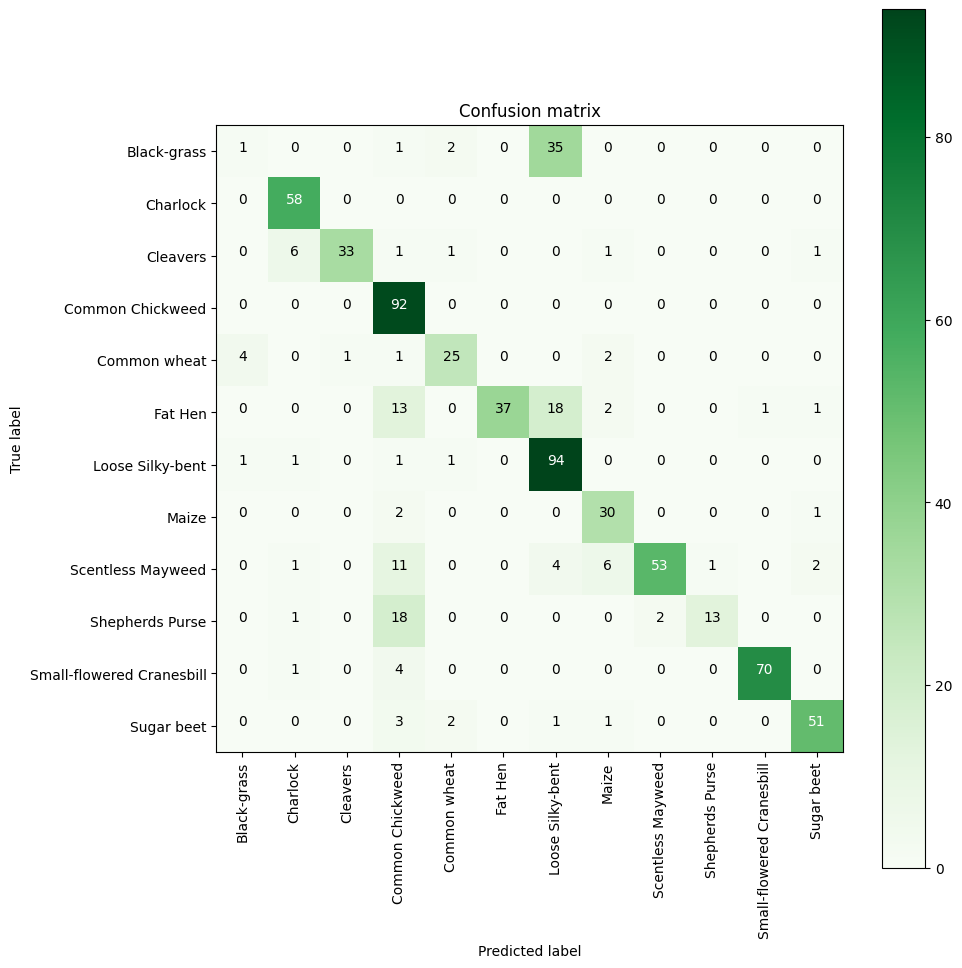

In [77]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = classifier.predict(X_test)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(y_test, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = categ)

## Observation:

- Model have few wrong predictions for 'Losse Silky Bent' and 'Common Chicweed' 

In [78]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses, average=None))

0.7330454901118714
0.7812061711079944
0.7601239308231215
[0.04444444 0.92063492 0.85714286 0.76987448 0.78125    0.67889908
 0.752      0.8        0.79699248 0.54166667 0.95890411 0.89473684]


**Producing classification Report**

In [79]:
from sklearn.metrics import classification_report

print(classification_report(trueY, predYClasses, target_names=categ))

                           precision    recall  f1-score   support

              Black-grass       0.17      0.03      0.04        39
                 Charlock       0.85      1.00      0.92        58
                 Cleavers       0.97      0.77      0.86        43
         Common Chickweed       0.63      1.00      0.77        92
             Common wheat       0.81      0.76      0.78        33
                  Fat Hen       1.00      0.51      0.68        72
         Loose Silky-bent       0.62      0.96      0.75        98
                    Maize       0.71      0.91      0.80        33
        Scentless Mayweed       0.96      0.68      0.80        78
          Shepherds Purse       0.93      0.38      0.54        34
Small-flowered Cranesbill       0.99      0.93      0.96        75
               Sugar beet       0.91      0.88      0.89        58

                 accuracy                           0.78       713
                macro avg       0.80      0.73      0.73    

## Observation:

- Recall, Precision and FI score are very low for Black-grass.
- Precison low for Loose Silky Bent too.
- Even from Confusion matrix, we see model did not perform well for black grass
- Overall Accuracy is good

In [80]:
history_df = pd.DataFrame(model1.history)
history_df.head()

loss  accuracy   val_loss  val_accuracy
0  1.867746  0.393985   9.179671      0.060393
1  1.279785  0.571729  12.789254      0.060393
2  1.114230  0.622556  10.929093      0.060393
3  0.943257  0.682707   7.690849      0.122191
4  0.901820  0.692632   5.712331      0.161517

**Plotting Loss and Accuracy for both Training and Validation sets**

<Axes: title={'center': 'Accuracy'}>

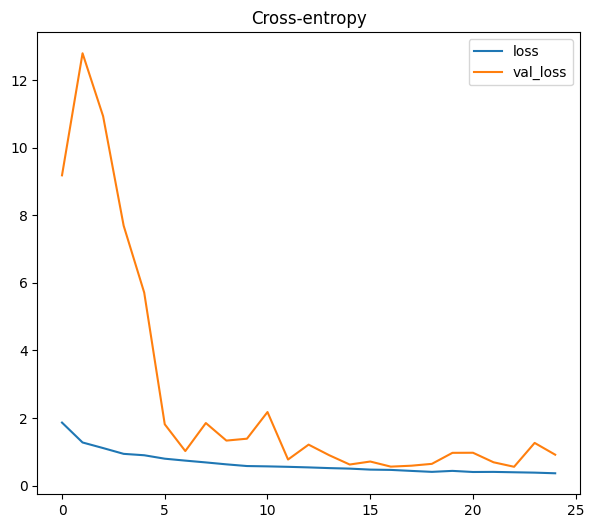

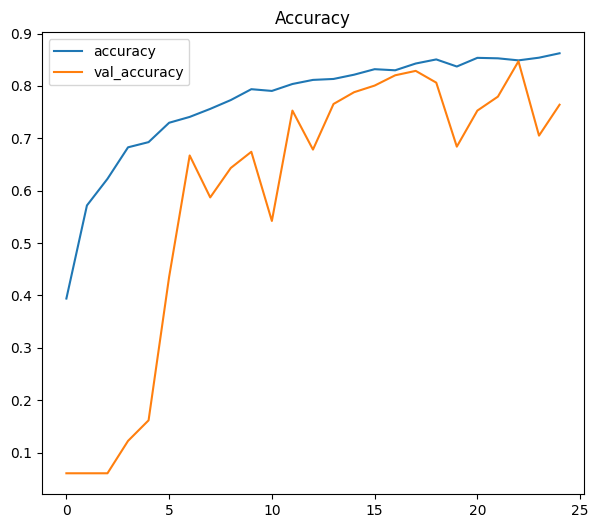

In [83]:
plt.rcParams["figure.figsize"] = (7,6)


history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

### Observation:

- Loss is decreasing and val loss is close to training loss
- Accuracy of val set is also close to training accuracy

There is some level of overfitting observerd based on the scores of val and testing sets

**Visualize predictions**

1/1 [==============================] - 0s 28ms/step
Model predicted category for X_test 2 is:  [10]
Actual Category for X_test 2 is:  10
Actual Category Name for X_test 2 is:  Small-flowered Cranesbill


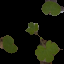

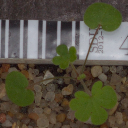

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 25ms/step
Model predicted category for X_test 3 is:  [1]
Actual Category for X_test 3 is:  1
Actual Category Name for X_test 3 is:  Charlock


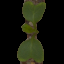

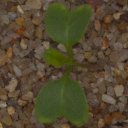

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 29ms/step
Model predicted category for X_test 33 is:  [7]
Actual Category for X_test 33 is:  7
Actual Category Name for X_test 33 is:  Maize


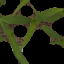

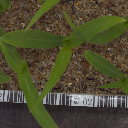

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 29ms/step
Model predicted category for X_test 36 is:  [6]
Actual Category for X_test 36 is:  6
Actual Category Name for X_test 36 is:  Loose Silky-bent


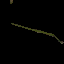

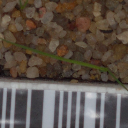

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 33ms/step
Model predicted category for X_test 59 is:  [2]
Actual Category for X_test 59 is:  2
Actual Category Name for X_test 59 is:  Cleavers


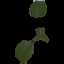

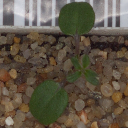

--------------------------------------------------------------------------------------------------


In [84]:
pred_2 = np.argmax(classifier.predict(np.expand_dims(X_test[2],axis=0)),axis=1)
actual_2 = np.argmax(y_test[2])
print("Model predicted category for X_test 2 is: ", pred_2)
print("Actual Category for X_test 2 is: ",actual_2 )
print("Actual Category Name for X_test 2 is: ",categ[actual_2] )
cv2_imshow(X_test[2]*255)
print("\n")
cv2_imshow(X_test_color[2])
print("--------------------------------------------------------------------------------------------------")
pred_3 = np.argmax(classifier.predict(np.expand_dims(X_test[3],axis=0)),axis=1)
actual_3 = np.argmax(y_test[3])
print("Model predicted category for X_test 3 is: ", pred_3)
print("Actual Category for X_test 3 is: ",actual_3 )
print("Actual Category Name for X_test 3 is: ",categ[actual_3] )
cv2_imshow(X_test[3]*255)
print("\n")
cv2_imshow(X_test_color[3])
print("--------------------------------------------------------------------------------------------------")
pred_33 = np.argmax(classifier.predict(np.expand_dims(X_test[33],axis=0)),axis=1)
actual_33 = np.argmax(y_test[33])
print("Model predicted category for X_test 33 is: ", pred_33)
print("Actual Category for X_test 33 is: ",actual_33 )
print("Actual Category Name for X_test 33 is: ",categ[actual_33] )
cv2_imshow(X_test[33]*255)
print("\n")
cv2_imshow(X_test_color[33])
print("--------------------------------------------------------------------------------------------------")
pred_36 = np.argmax(classifier.predict(np.expand_dims(X_test[36],axis=0)),axis=1)
actual_36 = np.argmax(y_test[36])
print("Model predicted category for X_test 36 is: ", pred_36)
print("Actual Category for X_test 36 is: ",actual_36 )
print("Actual Category Name for X_test 36 is: ",categ[actual_36] )
cv2_imshow(X_test[36]*255)
print("\n")
cv2_imshow(X_test_color[36])
print("--------------------------------------------------------------------------------------------------")
pred_59 = np.argmax(classifier.predict(np.expand_dims(X_test[59],axis=0)),axis=1)
actual_59 = np.argmax(y_test[59])
print("Model predicted category for X_test 59 is: ", pred_59)
print("Actual Category for X_test 59 is: ",actual_59 )
print("Actual Category Name for X_test 59 is: ",categ[actual_59] )
cv2_imshow(X_test[59]*255)
print("\n")
cv2_imshow(X_test_color[59])
print("--------------------------------------------------------------------------------------------------")

## Observations

- We have built a CNN-model to predict the class of a plant, which works quite well. (Increasing number of epochs and/or adding layers to a model can even increase the performance)

- CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification

## Model 2

**Creating CNN model for Grayscale Images**

Split the dataset into training, testing, and validation set

In [86]:
from sklearn.model_selection import train_test_split

val_split = 0.25
#1st split into train and test
X_train, X_test1, y_train, y_test1 = train_test_split(preprocessed_data_gs, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#for my color image purpose and individual image pred.
X_train_color, X_test1_color, y_train_color, y_test1_color = train_test_split(data, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#2nd split into val and test
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)
#for my color image purpose and individual image pred.
X_val_color, X_test_color, y_val_color, y_test_color = train_test_split(X_test1_color, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)

X = np.concatenate((X_train, X_test1))
y = np.concatenate((y_train, y_test1))

In [87]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X_train shape:  (3325, 64, 64)
y_train shape:  (3325, 12)
X_val shape:  (712, 64, 64)
y_val shape:  (712, 12)
X_test shape:  (713, 64, 64)
y_test shape:  (713, 12)
X shape:  (4750, 64, 64)
y shape:  (4750, 12)


## Observation:

- X_train has 3325 plant images
- X_val has 712 plant images
- X_test has 713 plant images
- Plant images are in 64X64 shape with grayscale

**Reshaping data into shapes compatible with Keras models**

In [88]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

**Using ImageDataGenerator for common data augmentation techniques**

In [89]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )


# test_val_datagen = ImageDataGenerator(rescale = 1./255)

In [90]:
training_set = train_datagen.flow(X_train,y_train,batch_size=batch_size,seed=random_state,shuffle=True)
# val_set = test_val_datagen.flow(X_val,y_val,batch_size=32,seed=random_state,shuffle=True)
# test_set = test_val_datagen.flow(X_test,y_test,batch_size=32,seed=random_state,shuffle=True)

**CNN Model building**

In [91]:
# Initialising the CNN classifier1
classifier1 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(32, (3, 3), input_shape = (64, 64, 1), activation = 'relu', padding = 'same'))
#Adding Batch Normalization
classifier1.add(layers.BatchNormalization())
# Add a Max Pooling layer of size 2X2
classifier1.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
classifier1.add(layers.BatchNormalization())
classifier1.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'valid')) #no Padding
classifier1.add(layers.BatchNormalization())
classifier1.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Flattening the layer before fully connected layers
classifier1.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier1.add(layers.BatchNormalization())
classifier1.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.2
classifier1.add(Dropout(0.2))


# Adding a fully connected layer with 128 neurons
classifier1.add(layers.BatchNormalization())
classifier1.add(Dense(units = 256, activation = 'relu'))
# classifier1.add(Dropout(0.2))


# The final output layer with 10 neurons to predict the categorical classifcation
classifier1.add(Dense(units = 12, activation = 'softmax'))

**Printing the Summary**

In [92]:
classifier1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                      

**Compiling and Fitting the model**

In [93]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
classifier1.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.001, restore_best_weights=True)

model2 = classifier1.fit(training_set,
               batch_size=batch_size,
               epochs=epochs,
               validation_data = (X_val,y_val),
               shuffle=True, 
               callbacks = [callback_es])

Epoch 1/25
104/104 [==============================] - 54s 493ms/step - loss: 1.9939 - accuracy: 0.3426 - val_loss: 8.4702 - val_accuracy: 0.0604
Epoch 2/25
104/104 [==============================] - 39s 379ms/step - loss: 1.5972 - accuracy: 0.4304 - val_loss: 9.5306 - val_accuracy: 0.0604
Epoch 3/25
104/104 [==============================] - 36s 350ms/step - loss: 1.4708 - accuracy: 0.4818 - val_loss: 10.0062 - val_accuracy: 0.0604
Epoch 4/25
104/104 [==============================] - 39s 375ms/step - loss: 1.3473 - accuracy: 0.5212 - val_loss: 8.9790 - val_accuracy: 0.0604
Epoch 5/25
104/104 [==============================] - 40s 383ms/step - loss: 1.2282 - accuracy: 0.5600 - val_loss: 7.5451 - val_accuracy: 0.0646
Epoch 6/25
104/104 [==============================] - 38s 362ms/step - loss: 1.1936 - accuracy: 0.5735 - val_loss: 3.5030 - val_accuracy: 0.2289
Epoch 7/25
104/104 [==============================] - 38s 368ms/step - loss: 1.1264 - accuracy: 0.6057 - val_loss: 2.8053 - val_a

**Evaluating on Test data**

In [94]:
classifier1.evaluate(X_test,y_test)

23/23 [==============================] - 2s 65ms/step - loss: 1.1948 - accuracy: 0.6045


[1.1947994232177734, 0.6044880747795105]

**Best model accuracy from all epochs which has least loss**

In [95]:
best_model_accuracy = model2.history['accuracy'][np.argmin(model2.history['loss'])]
best_model_accuracy

0.7263157963752747

## Observations:

- Test Accuracy is 60.4%
- Validation model accuracy for least loss is 67% where as after all cycles, it is ~63%

**Printing out the Confusion Matrix**

23/23 [==============================] - 2s 68ms/step


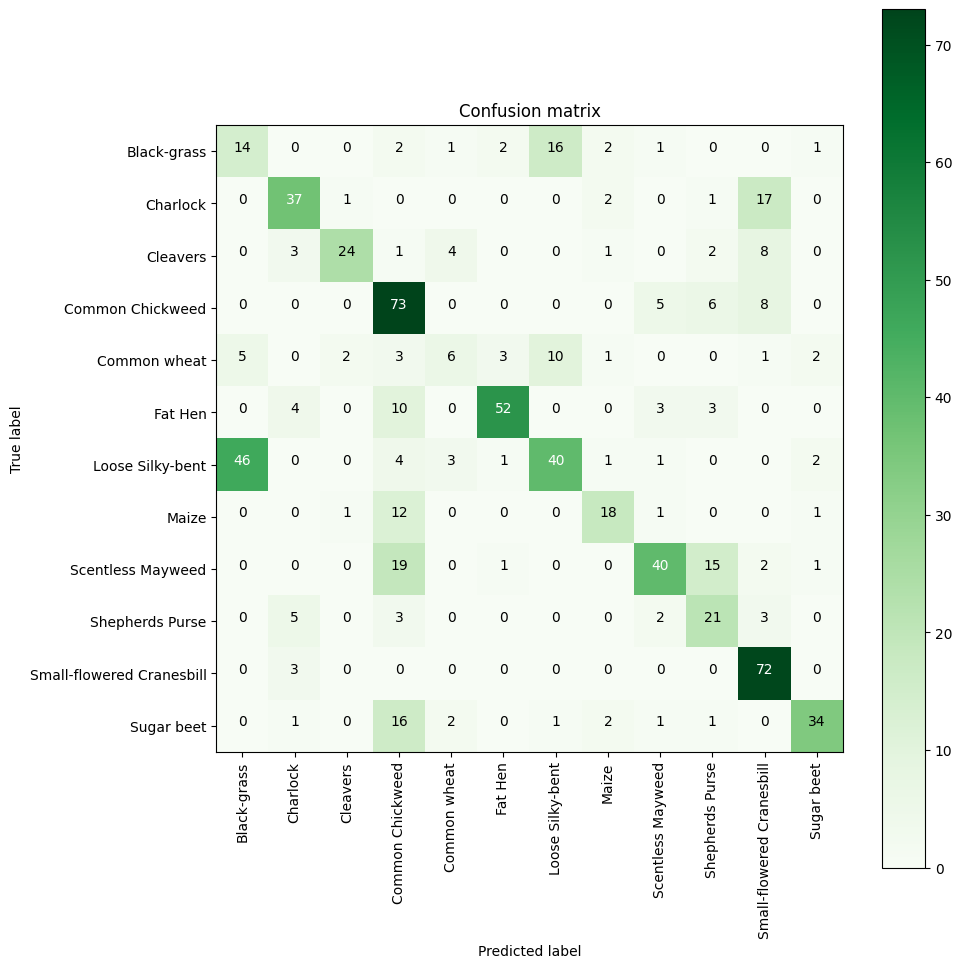

In [96]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = classifier1.predict(X_test)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(y_test, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = categ) 

## Observations:

Model did not perform well for:

- Black grass and Loose Silky bent
- Common chic weed and loose silky bent
- Shepherds purse and scentless mayweed

In [106]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses, average=None))

0.577501406764614
0.6044880785413744
0.6035512931828394
[0.26923077 0.66666667 0.67605634 0.6212766  0.24489796 0.79389313
 0.48484848 0.6        0.60606061 0.5060241  0.77419355 0.68686869]


**Classification Report**

In [107]:
from sklearn.metrics import classification_report

print(classification_report(trueY, predYClasses, target_names=categ))

                           precision    recall  f1-score   support

              Black-grass       0.22      0.36      0.27        39
                 Charlock       0.70      0.64      0.67        58
                 Cleavers       0.86      0.56      0.68        43
         Common Chickweed       0.51      0.79      0.62        92
             Common wheat       0.38      0.18      0.24        33
                  Fat Hen       0.88      0.72      0.79        72
         Loose Silky-bent       0.60      0.41      0.48        98
                    Maize       0.67      0.55      0.60        33
        Scentless Mayweed       0.74      0.51      0.61        78
          Shepherds Purse       0.43      0.62      0.51        34
Small-flowered Cranesbill       0.65      0.96      0.77        75
               Sugar beet       0.83      0.59      0.69        58

                 accuracy                           0.60       713
                macro avg       0.62      0.57      0.58    

## Observations:

- Recall is very low for Black-grass and common wheat
- Precison is very low for Black grass and Shepherds Purse
- Even from Confusion matrix, we see model did not perform well for black grass

Overall Accuracy is also not that great

Storing in a DF each epoch's loss and Accuracy for training and validation sets

In [97]:
history_df2 = pd.DataFrame(model2.history)
history_df2.head()

loss  accuracy   val_loss  val_accuracy
0  1.993871  0.342556   8.470194      0.060393
1  1.597162  0.430376   9.530587      0.060393
2  1.470762  0.481805  10.006213      0.060393
3  1.347313  0.521203   8.979019      0.060393
4  1.228237  0.560000   7.545136      0.064607

Plotting Loss and Accuracy for training and validation sets

<Axes: title={'center': 'Accuracy'}>

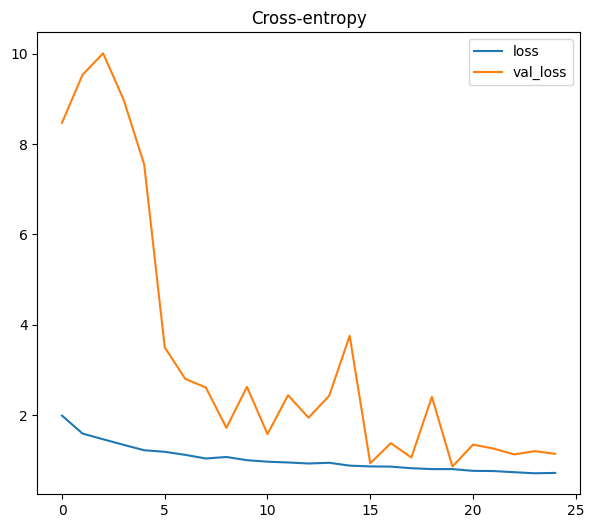

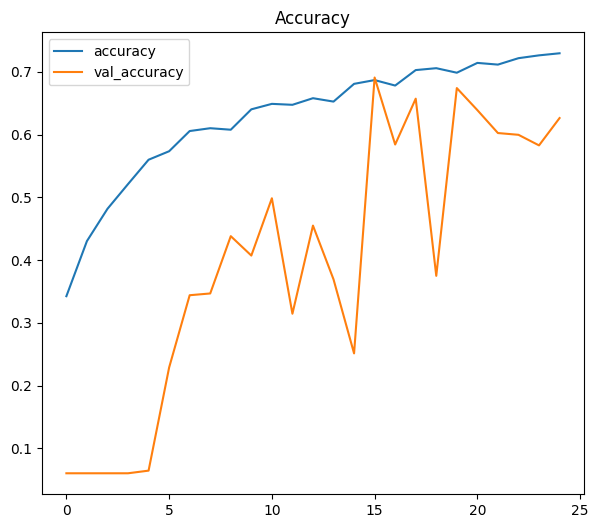

In [98]:
plt.rcParams["figure.figsize"] = (7,6)


history_df2.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df2.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

**Visualize predictions for x_test**

1/1 [==============================] - 0s 61ms/step
Model predicted category for X_test 2 is:  [10]
Actual Category for X_test 2 is:  10
Actual Category Name for X_test 2 is:  Small-flowered Cranesbill


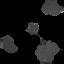

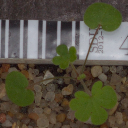

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 42ms/step
Model predicted category for X_test 3 is:  [10]
Actual Category for X_test 3 is:  1
Actual Category Name for X_test 3 is:  Charlock


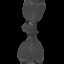

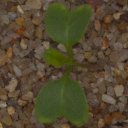

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 39ms/step
Model predicted category for X_test 33 is:  [3]
Actual Category for X_test 33 is:  7
Actual Category Name for X_test 33 is:  Maize


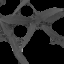

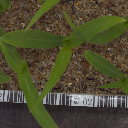

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 40ms/step
Model predicted category for X_test 36 is:  [0]
Actual Category for X_test 36 is:  6
Actual Category Name for X_test 36 is:  Loose Silky-bent


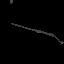

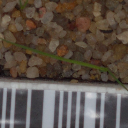

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 41ms/step
Model predicted category for X_test 59 is:  [10]
Actual Category for X_test 59 is:  2
Actual Category Name for X_test 59 is:  Cleavers


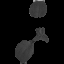

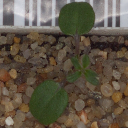

--------------------------------------------------------------------------------------------------


In [99]:
pred_2 = np.argmax(classifier1.predict(np.expand_dims(X_test[2],axis=0)),axis=1)
actual_2 = np.argmax(y_test[2])
print("Model predicted category for X_test 2 is: ", pred_2)
print("Actual Category for X_test 2 is: ",actual_2 )
print("Actual Category Name for X_test 2 is: ",categ[actual_2] )
cv2_imshow(X_test[2]*255)
print("\n")
cv2_imshow(X_test_color[2])
print("--------------------------------------------------------------------------------------------------")
pred_3 = np.argmax(classifier1.predict(np.expand_dims(X_test[3],axis=0)),axis=1)
actual_3 = np.argmax(y_test[3])
print("Model predicted category for X_test 3 is: ", pred_3)
print("Actual Category for X_test 3 is: ",actual_3 )
print("Actual Category Name for X_test 3 is: ",categ[actual_3] )
cv2_imshow(X_test[3]*255)
print("\n")
cv2_imshow(X_test_color[3])
print("--------------------------------------------------------------------------------------------------")
pred_33 = np.argmax(classifier1.predict(np.expand_dims(X_test[33],axis=0)),axis=1)
actual_33 = np.argmax(y_test[33])
print("Model predicted category for X_test 33 is: ", pred_33)
print("Actual Category for X_test 33 is: ",actual_33 )
print("Actual Category Name for X_test 33 is: ",categ[actual_33] )
cv2_imshow(X_test[33]*255)
print("\n")
cv2_imshow(X_test_color[33])
print("--------------------------------------------------------------------------------------------------")
pred_36 = np.argmax(classifier1.predict(np.expand_dims(X_test[36],axis=0)),axis=1)
actual_36 = np.argmax(y_test[36])
print("Model predicted category for X_test 36 is: ", pred_36)
print("Actual Category for X_test 36 is: ",actual_36 )
print("Actual Category Name for X_test 36 is: ",categ[actual_36] )
cv2_imshow(X_test[36]*255)
print("\n")
cv2_imshow(X_test_color[36])
print("--------------------------------------------------------------------------------------------------")
pred_59 = np.argmax(classifier1.predict(np.expand_dims(X_test[59],axis=0)),axis=1)
actual_59 = np.argmax(y_test[59])
print("Model predicted category for X_test 59 is: ", pred_59)
print("Actual Category for X_test 59 is: ",actual_59 )
print("Actual Category Name for X_test 59 is: ",categ[actual_59] )
cv2_imshow(X_test[59]*255)
print("\n")
cv2_imshow(X_test_color[59])
print("--------------------------------------------------------------------------------------------------")

## Observations -

- We have built a CNN-model to predict the class of a plant, which works quite well. (Increasing number of epochs and/or adding layers to a model can even increase the performance)

- CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification

- Earlier model was better than this later model even though both models made use to data augmentation.
